This is a dataset of over a million headlines taken from the Australian news source ABC (Start Date: 2003-02-19 ; End Date: 2020-12-31).

- Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.
- Create and save a plot of sentiment over time with a 1-week rolling average
- Create and save a plot of sentiment over time with a 1-month rolling average
- Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot
- Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 1) What (if any) are the general trends? 2) What (if any) inferences might you draw from them?


- HINT: You'll probably want to calculate an average score for each day first, before calculating the rolling averages for weeks and months.


__General instructions__

- For this assignment, you should upload a standalone .py script which can be executed from the command line or a Jupyter Notebook
- Save your script as sentiment.py or sentiment.ipynb
- Make sure to include a requirements.txt file and details about where to find the data
- You can either upload the scripts here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow the structure of your script and to use them from the command line


__Purpose__

This assignment is designed to test that you have a understanding of:

- how to perform dictionary-based sentiment analysis in Python;
- how to effectively use pandas and spaCy in a simple NLP workflow;
- how to present results visually, working with datetime formats to show trends over time

In [23]:
import os #For integrating with operating systems
import spacy #For performing nlp-tasks
import pandas as pd #For creating dataframes
import matplotlib.pyplot as plt #For creating plots
from spacytextblob.spacytextblob import SpacyTextBlob #For sentiment analysis.

#Initialize spaCy
nlp = spacy.load("en_core_web_sm")
#Initialize spaCy text blob and add is a component to the spaCy nlp-pipeline
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

In [2]:
in_file = os.path.join("..", "data", "headlines", "abcnews-date-text.csv") #Specify path to data.

In [3]:
headlines = pd.read_csv(in_file) #Read the .csv-file as a dataframe called 'headlines'.

In [4]:
headlines.sample(5) #Print 5 values from the 'headlines'-dataframe (sanity check)

,publish_date,headline_text
1085797,20170613,sri lanka reportedly agrees to look for confli...
385904,20080526,aust marks 10th sorry day
520818,20100221,man drowns after being caught in rip
69853,20040201,police search for man after cemetery assault
260788,20060919,bank teller jailed for stealing customers money


__Calculate sentiment__

In [5]:
headlines['publish_date'] = pd.to_datetime(headlines.publish_date, format="%Y%m%d") #Converting the publish_date to a datetime format. Following the output above I specify that the dates are arranged as years, months, days (%Y%m%d). Y is upper case since the year is specified with century (i.e. four numbers).  
headlines = headlines.sort_values("publish_date") #Sorting the dates in chronological order.

In [6]:
len(headlines) #Printing the lenght of the dataframe (i.e. the amount of comments in the dataset).

1226258

In [7]:
headlines = headlines.sample(100000) #To reduce processing time, I take a sample of 100.000 comments. If you wish to process the full data just remove this line of code.

In [8]:
#%%time #Specify that I want to print the time it takes me to run the cell.

sentiment_scores = [] #Define empty list for sentiment-scores.

for doc in nlp.pipe(headlines["headline_text"], batch_size=500): #For each headline in the headline_text column (iterated chronologically)...
    score = doc._.sentiment.polarity #... calculate text polarity and save it as 'score'...
    sentiment_scores.append(score) #... append 'score' to the 'sentiment_scores'-list

CPU times: user 3min 6s, sys: 86.6 ms, total: 3min 6s
Wall time: 3min 6s


In [9]:
len(sentiment_scores) #Ensuring that the code worked (sanity check).

100000

In [11]:
#Append list with the sentiment score into pandas dataframe
headlines["sentiment_score"] = sentiment_scores

In [12]:
headlines.sample(5) #(sanity check)

,publish_date,headline_text,sentiment_score
688949,2012-04-20,dancing robot wows crowd,0.000000
1013624,2016-03-02,super tuesday trump clinton score super tuesda...,0.322222
938826,2015-03-18,hayward jones dont turn away from vanuatu's de...,0.000000
60731,2003-12-12,dying man wins workplace compo claim,0.300000
2437,2003-03-02,man arrested with mortar at kuwait hotel released,0.000000


In [13]:
#Compute mean sentiment score for week and month
mean_week = headlines.resample("w",on ="publish_date").mean()
mean_month = headlines.resample("m",on ="publish_date").mean()

In [14]:
print(mean_week) #Sanity check
print(mean_month) #Sanity check

              sentiment_score
publish_date                 
2003-02-23           0.004573
2003-03-02           0.041749
2003-03-09           0.027209
2003-03-16           0.010174
2003-03-23           0.028953
...                       ...
2020-12-06           0.012420
2020-12-13           0.005134
2020-12-20           0.032329
2020-12-27           0.021744
2021-01-03           0.027066

[933 rows x 1 columns]
              sentiment_score
publish_date                 
2003-02-28           0.013679
2003-03-31           0.030971
2003-04-30           0.023514
2003-05-31           0.028202
2003-06-30           0.013187
...                       ...
2020-08-31           0.002336
2020-09-30           0.022215
2020-10-31           0.021449
2020-11-30           0.047005
2020-12-31           0.019685

[215 rows x 1 columns]


__As we can see from the above output, `mean_week` contains weekly averages of sentiment scores whereas `mean_month` contains monthly averages.__

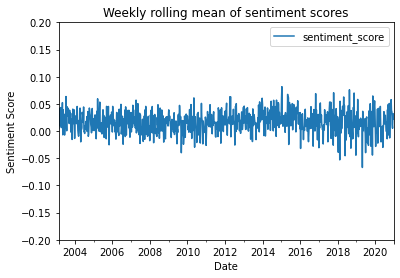

In [15]:
#Make plot of the weekly rolling mean of sentiment scores
week_plot = mean_week.plot(
    ylabel = "Sentiment Score", #Define the label for the y-axis.
    xlabel = "Date", #Define the label for the x-axis.
    ylim = (-0.2,0.2), #Set the window size on the y-axis.
    title = "Weekly rolling mean of sentiment scores") #Plot title

In [19]:
#Save week_plot.
mean_week_plot = week_plot.get_figure()
mean_week_plot.savefig(os.path.join("..", "data", "mean_week_plot"))

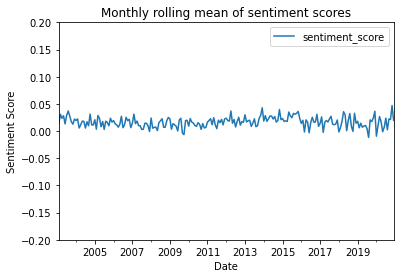

In [21]:
#Make plot of the monthly rolling mean of sentiment scores
month_plot = mean_month.plot(
    ylabel = "Sentiment Score",
    xlabel = "Date",
     ylim = (-0.2,0.2),
    title = "Monthly rolling mean of sentiment scores")

In [22]:
mean_month_plot = month_plot.get_figure()
mean_month_plot.savefig(os.path.join("..", "data", "mean_month_plot"))

__Plot inferences__

The two plots show that the news data is generally positive (Sentiment score > 0) in spite of the fluctuations on a weekly/monthly basis. We see that the variance in sentiment scores is larger on a weekly basis than on a monthly basis, indicating that the variance seen from week to week is quite similar in both directions and thus, to a certain extent, cancels each other out when analysed on a monthly basis.

In [25]:
headlines.to_csv(os.path.join("..", "data", "sentiment.csv")) #Write the dataframe as a .csv-file called 'file1'.